In [112]:
#Imporing the libraries

import numpy as np
import datetime
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [113]:
#Importing the data files

account = pd.read_csv('pkdd99_database/account.asc', sep=';')
card = pd.read_csv('pkdd99_database/card.asc', sep=';')
client = pd.read_csv('pkdd99_database/client.asc', sep=';')
loan = pd.read_csv('pkdd99_database/loan.asc', sep=';')
trans = pd.read_csv('pkdd99_database/trans.csv', sep=',', low_memory=False)

In [159]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [114]:
#Defining the starting and end dates
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(1999,1,1)

In [115]:
# function to convert a date to (days after start_date)
def convert_date_to_days(x):
    td = x - start_date
    return td.days

In [116]:
# function to convert a date to age at end_date
def convert_to_age_days(x):
    td = end_date - x
    return td.days

In [117]:
#Converting the Card issued date to a datetime object

card['issued'] = pd.to_datetime(card['issued'].str[:6], format='%y%m%d')

In [118]:
# check the date column for null values

card['issued'].isnull().sum()

0

In [119]:
#Convert the card issued date to days in number
card['card_issued_date'] = card['issued'].map(convert_date_to_days)
del card['issued']

In [120]:
# functions to convert the format of the birth_number.

# returns the middle two digits

def get_mid2_dig(x):
    return int(x/100) % 100

# returns the month of birth_number column.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# return the month (of birth_number)
def get_day(x):
    return x % 100

# returns the year (of birth_number)
def get_year(x):
    return int(x/10000)

# determine the gender 
def get_gender(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return 'F'
    else:
        return 'M'

# convert the birth_number into date
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

# convert birth_number into age.
def convert_birthday_to_age(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return convert_to_age_days(datetime.datetime(yr,mth,day))/365
    
client['client_age'] = client['birth_number'].map(convert_birthday_to_age)
client['client_gender'] = client['birth_number'].map(get_gender)
del client['birth_number']

In [121]:
# rename columns in Card
card = card.rename(columns={'type': 'card_type'})
card.head()

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410


In [122]:
# Rename columns in Client dataset.
client = client.rename(columns={'district_id': 'client_district_id'})
client.head()

,client_id,client_district_id,client_age,client_gender
0,1,18,28.071233,F
1,2,1,53.942466,M
2,3,1,58.268493,F
3,4,5,42.112329,M
4,5,5,38.523288,F


In [123]:
# Export the cleaned Client Data set
client.to_csv("cleaned_client.csv", index=False)

(array([  9., 236., 468., 393., 413., 408., 411., 385., 418., 418., 433.,
        364., 260., 215., 205., 215., 104.,  14.]),
 array([11.27123288, 15.5021309 , 19.73302892, 23.96392694, 28.19482496,
        32.42572298, 36.656621  , 40.88751903, 45.11841705, 49.34931507,
        53.58021309, 57.81111111, 62.04200913, 66.27290715, 70.50380518,
        74.7347032 , 78.96560122, 83.19649924, 87.42739726]),
 <BarContainer object of 18 artists>)

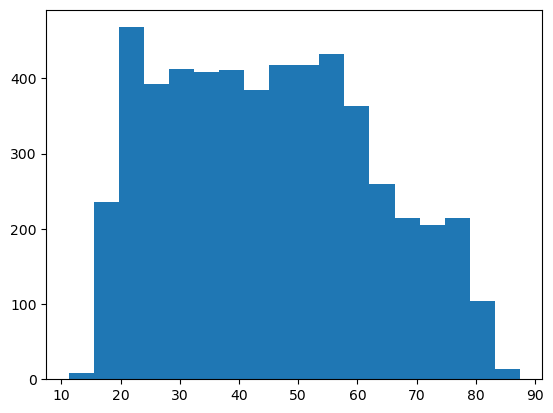

In [158]:
#Plotting age of clients
plt.hist(client['client_age'], 18)

array([<AxesSubplot: title={'center': 'client_gender'}>], dtype=object)

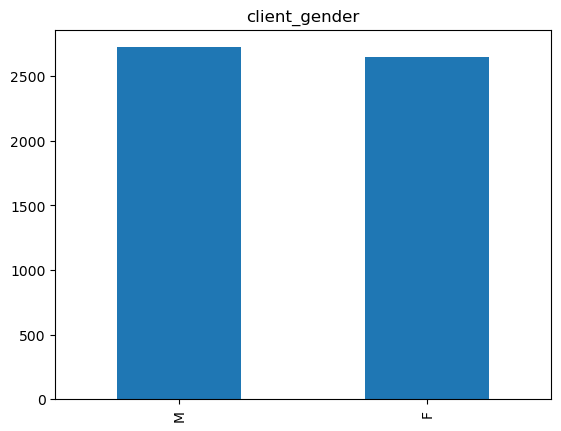

In [125]:
#Plotting gender of clients
client['client_gender'].value_counts().plot(kind='bar', subplots=True)

In [126]:
# Renaming columns for Account
account = account.rename(columns={'district_id': 'account_district_id'})

account.head()

,account_id,account_district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [127]:
#Converting date columns in the Account table
account['date'] = account['date'].map(convert_int_to_date)
account['account_date_opened'] = account['date'].map(convert_date_to_days)
del account['date']

In [128]:
#Checking the frequency ofAccount table
account['frequency'].value_counts()

POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: frequency, dtype: int64

In [129]:
# Translate frequency of transactions to English.
def convert_freq_to_eng(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account['frequency'] = account['frequency'].map(convert_freq_to_eng)

In [130]:
# Renaming columns for Account

account = account.rename(columns={'frequency': 'statement_freq'})
account.head()

,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1


In [153]:
combined_data = pd.merge_ordered(account, loan, on='account_id', how='left')
features = ['account_id', 'loan_id', 'account_district_id', 'statement_freq', 'account_date_opened', 'amount', 'duration', 'payments']
data_for_model = combined_data[features + ['status']].dropna() 

In [152]:
data_for_model.to_csv("data_4_model_Loan-Service.csv", index=False)

In [133]:
# Verificando se 'data_for_model' é um DataFrame
if not isinstance(data_for_model, pd.DataFrame):
    data_for_model = pd.DataFrame(data_for_model, columns=['account_id', 'loan_id', 'account_district_id', 'statement_freq', 'account_date_opened', 'amount', 'duration', 'payments', 'status'])

In [151]:
if not isinstance(trans, pd.DataFrame):
    trans = pd.DataFrame(trans, columns=['trans_id', 'account_id', 'date', 'type', 'operation', 'amount', 'balance', 'k_symbol', 'bank', 'account'])

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


trans = trans.drop('Unnamed: 0', axis=1, errors='ignore')

trans.fillna(0, inplace=True)

saldo_medio_por_conta = trans.groupby('account_id')['balance'].mean().reset_index()

X = saldo_medio_por_conta[['account_id']]  # Use 'account_id' como exemplo de variável independente
y = saldo_medio_por_conta['balance']  # Variável dependente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as variáveis independentes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crie e treine o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Faça previsões no conjunto de teste
predictions = model.predict(X_test_scaled)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 217756964.05699328


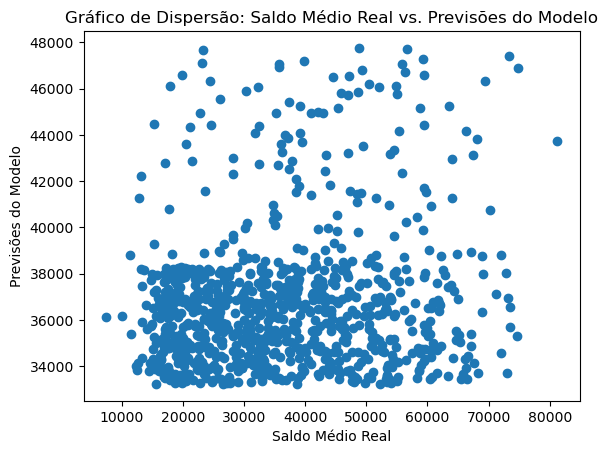

In [149]:
#Grafico de Despersao

import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Saldo Médio Real')
plt.ylabel('Previsões do Modelo')
plt.title('Gráfico de Dispersão: Saldo Médio Real vs. Previsões do Modelo')
plt.show()

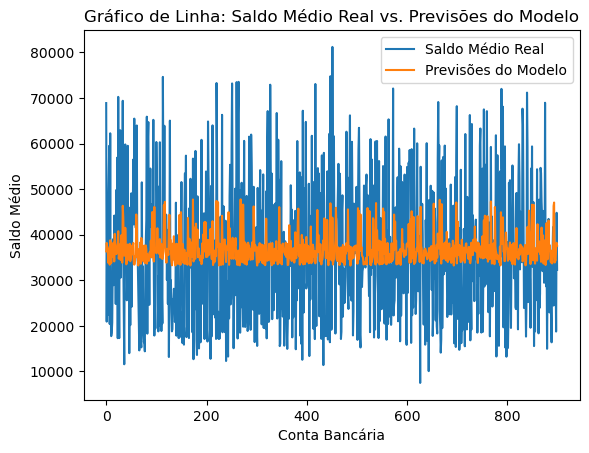

In [150]:
#Grafico de Linha

plt.plot(y_test.values, label='Saldo Médio Real')
plt.plot(predictions, label='Previsões do Modelo')
plt.xlabel('Conta Bancária')
plt.ylabel('Saldo Médio')
plt.title('Gráfico de Linha: Saldo Médio Real vs. Previsões do Modelo')
plt.legend()
plt.show()

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Supondo que 'client' seja o DataFrame com seus dados
# Certifique-se de que 'client' já passou pelo processo de tratamento de dados adequado

# Defina as variáveis independentes (X) e a variável dependente (y)
X = client[['client_district_id', 'client_age']]
y = (client['client_age'] < 18).astype(int)  # Converte True/False para 1/0 (menor de idade ou não)

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronize as variáveis independentes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crie e treine o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Faça previsões no conjunto de teste
predictions = model.predict(X_test_scaled)

# Avalie o desempenho do modelo
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Acurácia do Modelo: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)

Acurácia do Modelo: 0.9860335195530726
Matriz de Confusão:
[[1058    0]
 [  15    1]]


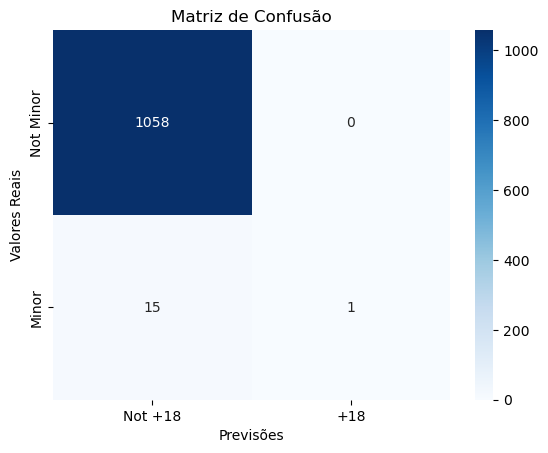

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crie a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not +18', '+18'], yticklabels=['Not Minor', 'Minor'])
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

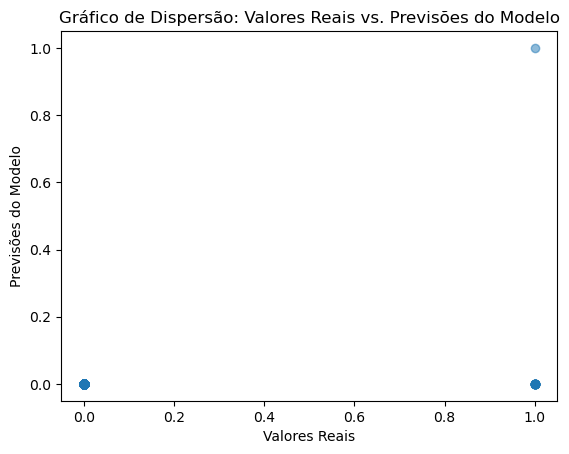

In [157]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões do Modelo')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')
plt.show()

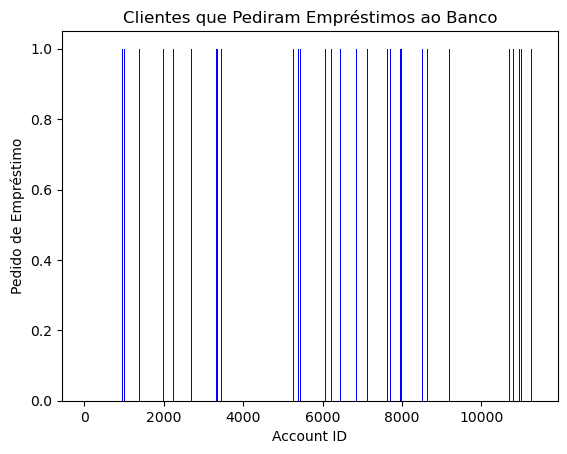

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

clientes_com_emprestimo = loan['account_id'].unique()

plt.bar(clientes_com_emprestimo, height=1, color='blue')
plt.xlabel('Account ID')
plt.ylabel('Pedido de Empréstimo')
plt.title('Clientes que Pediram Empréstimos ao Banco')
clientes_com_emprestimo
plt.show()
